<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/exercice_python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier

**Exercice 1**

In [0]:
NOM_VAR = ['WIFE_AGE','WIFE_EDU','HUSB_EDU','NUM_OF_CHILD','WIFE_RELI','WIFE_WORK','HUSB_OCUP','STA_OF_LIV','MEDIA_EXP','CONTRACEPTIVE']

donnee = pd.read_csv("/Users/nicolasvieille/cmc.data.txt",sep=',',header=None,names=NOM_VAR)

donnee['CONTRACEPTIVE'].value_counts()



1    629
3    511
2    333
Name: CONTRACEPTIVE, dtype: int64

In [0]:
print(donnee)

      WIFE_AGE  WIFE_EDU  HUSB_EDU  NUM_OF_CHILD  WIFE_RELI  WIFE_WORK  \
0           24         2         3             3          1          1   
1           45         1         3            10          1          1   
2           43         2         3             7          1          1   
3           42         3         2             9          1          1   
4           36         3         3             8          1          1   
...        ...       ...       ...           ...        ...        ...   
1468        33         4         4             2          1          0   
1469        33         4         4             3          1          1   
1470        39         3         3             8          1          0   
1471        33         3         3             4          1          0   
1472        17         3         3             1          1          1   

      HUSB_OCUP  STA_OF_LIV  MEDIA_EXP  CONTRACEPTIVE  
0             2           3          0              1  

In [0]:
donnee.columns

Index(['WIFE_AGE', 'WIFE_EDU', 'HUSB_EDU', 'NUM_OF_CHILD', 'WIFE_RELI',
       'WIFE_WORK', 'HUSB_OCUP', 'STA_OF_LIV', 'MEDIA_EXP', 'CONTRACEPTIVE'],
      dtype='object')

In [0]:
features = [o for o in donnee.columns if o != 'CONTRACEPTIVE']
X=donnee[features]
Y=donnee['CONTRACEPTIVE']

Y_red = np.where(Y==1,0,1)



In [0]:
a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']

#for var in a_dummies:
   # X.loc[:,var] = X.loc[:,var].copy().astype(str)
    
X_dum = pd.get_dummies(X[a_dummies])
    

In [0]:
A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]
X = pd.concat([X,X_dum], axis=1)

In [0]:
#Question 1

X_train,X_test, Y_train, Y_test = train_test_split(X,Y_red, random_state = 1998, test_size = 0.3)

In [0]:
#Question 2 logit1

clf = LogisticRegression(penalty='l2', random_state=1998,solver='lbfgs', C=1/2, max_iter = 1000)
clf?

In [0]:
#Question 3 entraîner le modèle

clf.fit(X_train, Y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1998, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Question 4
Y_pred= clf.predict(X_test)

In [0]:
#Question 5

accuracy_score(Y_test,Y_pred)

0.6628959276018099

In [0]:
#Question 6

confusion_matrix(Y_test,Y_pred)

array([[ 85, 106],
       [ 43, 208]])

In [0]:
#Qyestion 7

Y_pred_prob = clf.predict_proba(X_test)


In [0]:
#Question 8

Y_pred_prob = clf.predict_proba(X_test)[:,1]

print(Y_test.shape)
print(Y_pred_prob .shape)

roc_auc_score(Y_test, Y_pred_prob)

(442,)
(442,)


0.7180075509480404

In [0]:
#Question 9

fpr, tpr, threshold = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.7180075509480404

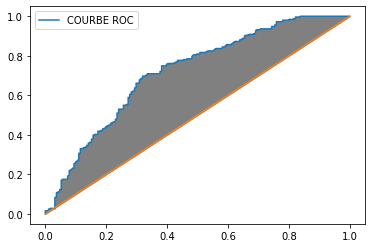

In [0]:
plt.plot(fpr,tpr,label = "COURBE ROC")
plt.plot([0,1],[0,1])
plt.fill_between(fpr,fpr,tpr,color = 'grey')
plt.legend()
plt.show()

**Exercice 2**

In [0]:
features = [o for o in donnee.columns if o != 'CONTRACEPTIVE']
X=donnee[features]
Y=donnee['CONTRACEPTIVE']

a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']

#for var in a_dummies:
 #   X.loc[:,var] = X.loc[:,var].copy().astype(str)
    
X_dum = pd.get_dummies(X[a_dummies])
    
A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]
X = pd.concat([X,X_dum], axis=1)    

In [0]:
#Question 1

#Y_red = np.where(Y==1,0,1) #essentiel

X_train,X_test, Y_train, Y_test = train_test_split(X,Y_red, random_state = 1998, test_size = 0.3)

In [0]:
#Question 2

arbre = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2)

In [0]:
#Question 3

arbre.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#Question 4

Y_pred = arbre.predict(X_test)

In [0]:
#Question 5

accuracy_score(Y_test,Y_pred)


0.7081447963800905

In [0]:
#Question 6

arbrebis = DecisionTreeClassifier(random_state = 1998, criterion='gini',max_depth=9,min_samples_split=4,min_samples_leaf= 3)

In [0]:
#Question 7

arbrebis.fit(X_train,Y_train)
Y_pred = arbrebis.predict(X_test)

#np.unique(Y_pred)

array([0, 1])

In [0]:
#Question 8

accuracy_score(Y_test,Y_pred)


0.7058823529411765

In [0]:
#Question 9 il faut dummifier

roc_auc_score(Y_test,arbrebis.predict_proba(X_test)[:,1])


0.7182057111866669

In [0]:
#essentiel
#import pandas as pd
#a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']
#
#for var in a_dummies:
#    X.loc[:,var] = X.loc[:,var].copy().astype(str)
    
#X_dum = pd.get_dummies(X[a_dummies])



#A_garder = [var for var in list(X) if var not in a_dummies]
#X = X[A_garder]
#X = pd.concat([X,X_dum], axis=1)
    

le score auc est 0.7182057111866669


<function matplotlib.pyplot.show(*args, **kw)>

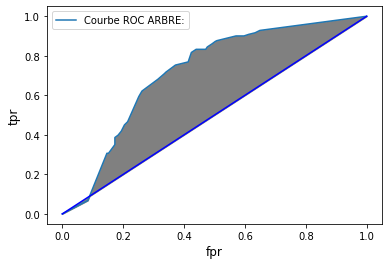

In [0]:
#Question 10

fpr, tpr, thresholds = roc_curve(Y_test,arbrebis.predict_proba(X_test)[:,1])

print("le score auc est "+ str(auc(fpr,tpr)))

plt.plot(fpr,tpr,label = "Courbe ROC ARBRE:")
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=2)
plt.show

In [0]:
NON_FEATURES = X_train.columns
IMPORTANCE_FEATURES = 100*np.round(arbrebis.feature_importances_,2)

loca = np.arange(len(IMPORTANCE_FEATURES))

index = np.argsort(IMPORTANCE_FEATURES)[::-1]

<function matplotlib.pyplot.show(*args, **kw)>

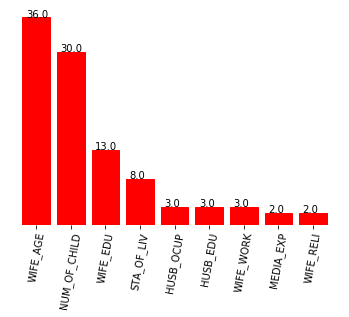

In [0]:
#Question 11

NON_FEATURES = X_train.columns


IMPORTANCE_FEATURES = 100*np.round(arbrebis.feature_importances_,2)
loca = np.arange(len(IMPORTANCE_FEATURES))

index = np.argsort(IMPORTANCE_FEATURES)[::-1]

IMPORTANCE_FEATURES = IMPORTANCE_FEATURES[index][0:15]
NON_FEATURES = NON_FEATURES[index][0:15]
loca  = loca[0:15]
import matplotlib.pyplot as plt
plt.bar(loca,IMPORTANCE_FEATURES,edgecolor='red',color='red')
plt.yticks([])
plt.xticks(loca,NON_FEATURES,color='black',rotation=80)
plt.box(False)
for i in range(0,len(NON_FEATURES)):
    plt.text(loca[i]-0.3,IMPORTANCE_FEATURES[i],str(np.round(IMPORTANCE_FEATURES[i],1)))
plt.show

Exercice 3

In [0]:
#Question 1

from sklearn.ensemble import RandomForestClassifier

randfo = RandomForestClassifier(criterion='gini', random_state = 1998, max_depth = 9, min_samples_split=3, min_samples_leaf=2, max_features=0.7)

randfo.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1998,
                       verbose=0, warm_start=False)

In [0]:
#Question 2

Max_features est la fraction du nombre de variable qui sont prises en compte pour déterminer chaque split.
Ne pas prendre en compte toutes les variables permet de garantir que les  arbres de la forêt soient moins corrélés entre eux. 

In [0]:
#Question 3

accuracy_score(Y_test, randfo.predict(X_test))

0.7307692307692307

In [0]:
#Question 4

roc_auc_score(Y_test, randfo.predict_proba(X_test)[:,1])

0.7709267641475981